In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df = pd.read_csv('city_temperature.csv')
#Upload the spreadsheet of minimum and maximum temperatures for each major city each day from Jan. 1995 to May 2020

C:\Users\jason\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Let's start off by comparing the climates of U.S vs. China, which are in similar latitudes and have the same climate classifications (humid subtropical and continential). What I'm interested is comparing a US city and a Chinese city that on's the same latitude and compare their winter temperatures (for simplictity, let's just compare their Janurary temperatures). Let's compare Beijing and Columbus (40th parallel) followed by Shanghai and Savannah (31st parallel). 

In [23]:
df[df['Country']=='China']['City'].unique()
#Let's see which cities in China have data from the spreadsheet

array(['Beijing', 'Chengdu', 'Guangzhou', 'Shanghai', 'Shenyang'],
      dtype=object)

In [24]:
dfshanghai = df[df['City']=='Shanghai']
#Let's make sure all the data of Shanghai is there

In [25]:
dfbeijing = df[df['City']=='Beijing']
dfbeijing.head()
#Let's grab all the data for the city of Beijing only 

,Region,Country,State,City,Month,Day,Year,AvgTemperature
256928,Asia,China,NaN,Beijing,1,1,1995,28.0
256929,Asia,China,NaN,Beijing,1,2,1995,29.0
256930,Asia,China,NaN,Beijing,1,3,1995,29.9
256931,Asia,China,NaN,Beijing,1,4,1995,34.5
256932,Asia,China,NaN,Beijing,1,5,1995,36.6


In [26]:
dfcolumbus = df[(df['City']=='Columbus') & (df['State']=='Ohio')]
dfcolumbus.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
2402743,North America,US,Ohio,Columbus,1,1,1995,42.4
2402744,North America,US,Ohio,Columbus,1,2,1995,21.4
2402745,North America,US,Ohio,Columbus,1,3,1995,22.5
2402746,North America,US,Ohio,Columbus,1,4,1995,14.3
2402747,North America,US,Ohio,Columbus,1,5,1995,8.1


In [27]:
dfsavannah = df[(df['State']=='Georgia') & (df['City']=='Savannah')]
dfsavannah.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1794721,North America,US,Georgia,Savannah,1,1,1995,51.2
1794722,North America,US,Georgia,Savannah,1,2,1995,54.4
1794723,North America,US,Georgia,Savannah,1,3,1995,44.5
1794724,North America,US,Georgia,Savannah,1,4,1995,40.5
1794725,North America,US,Georgia,Savannah,1,5,1995,37.7


In [28]:
dfcolumbus['Month and year'] = dfcolumbus['Month'].astype(str) + '-' + dfcolumbus['Year'].astype(str)
dfcolumbus.head()

C:\Users\jason\AppData\Local\Temp/ipykernel_12812/1012645055.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcolumbus['Month and year'] = dfcolumbus['Month'].astype(str) + '-' + dfcolumbus['Year'].astype(str)


,Region,Country,State,City,Month,Day,Year,AvgTemperature,Month and year
2402743,North America,US,Ohio,Columbus,1,1,1995,42.4,1-1995
2402744,North America,US,Ohio,Columbus,1,2,1995,21.4,1-1995
2402745,North America,US,Ohio,Columbus,1,3,1995,22.5,1-1995
2402746,North America,US,Ohio,Columbus,1,4,1995,14.3,1-1995
2402747,North America,US,Ohio,Columbus,1,5,1995,8.1,1-1995


In [29]:
#dfcolumbus.groupby('Month and year').mean().sort_values(by=['Month and year'], ascending=True).head(45)
dfcolumbusinjan = dfcolumbus[dfcolumbus['Month']==1]
dfcolumbusinjan.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Month and year
2402743,North America,US,Ohio,Columbus,1,1,1995,42.4,1-1995
2402744,North America,US,Ohio,Columbus,1,2,1995,21.4,1-1995
2402745,North America,US,Ohio,Columbus,1,3,1995,22.5,1-1995
2402746,North America,US,Ohio,Columbus,1,4,1995,14.3,1-1995
2402747,North America,US,Ohio,Columbus,1,5,1995,8.1,1-1995


In [30]:
dfcolumbusinjan.groupby('Month and year', as_index = False).mean().head()

,Month and year,Month,Day,Year,AvgTemperature
0,1-1995,1.0,16.0,1995.0,29.887097
1,1-1996,1.0,16.0,1996.0,27.932258
2,1-1997,1.0,16.0,1997.0,27.803226
3,1-1998,1.0,16.0,1998.0,37.387097
4,1-1999,1.0,16.0,1999.0,27.216129


In [31]:
dfsavannah['Month and year'] = dfsavannah['Month'].astype(str) + '-' + dfsavannah['Year'].astype(str)
dfsavannah.head()

C:\Users\jason\AppData\Local\Temp/ipykernel_12812/785632960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsavannah['Month and year'] = dfsavannah['Month'].astype(str) + '-' + dfsavannah['Year'].astype(str)


,Region,Country,State,City,Month,Day,Year,AvgTemperature,Month and year
1794721,North America,US,Georgia,Savannah,1,1,1995,51.2,1-1995
1794722,North America,US,Georgia,Savannah,1,2,1995,54.4,1-1995
1794723,North America,US,Georgia,Savannah,1,3,1995,44.5,1-1995
1794724,North America,US,Georgia,Savannah,1,4,1995,40.5,1-1995
1794725,North America,US,Georgia,Savannah,1,5,1995,37.7,1-1995


In [32]:
dfsavannahinjan = dfsavannah[dfsavannah['Month']== 1]
dfsavannahinjan.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Month and year
1794721,North America,US,Georgia,Savannah,1,1,1995,51.2,1-1995
1794722,North America,US,Georgia,Savannah,1,2,1995,54.4,1-1995
1794723,North America,US,Georgia,Savannah,1,3,1995,44.5,1-1995
1794724,North America,US,Georgia,Savannah,1,4,1995,40.5,1-1995
1794725,North America,US,Georgia,Savannah,1,5,1995,37.7,1-1995


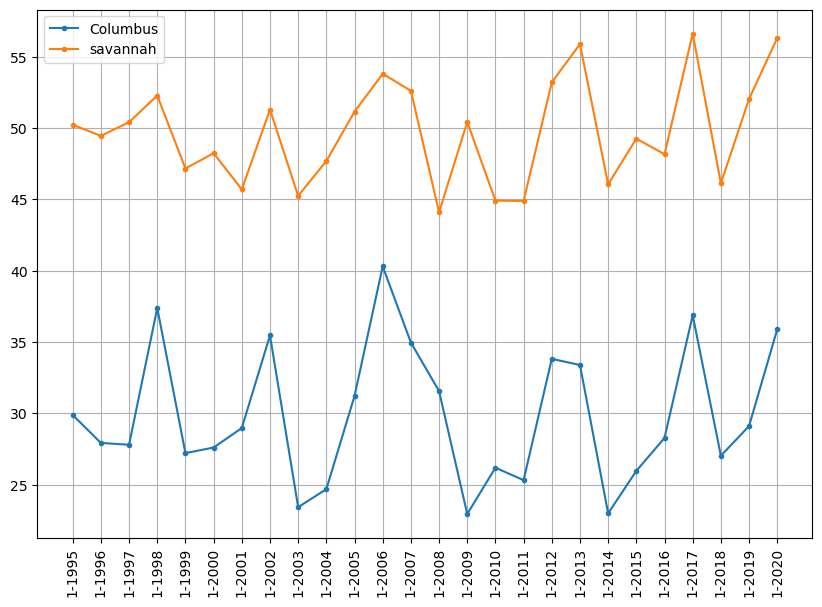

In [33]:
plt.figure(figsize=(10,7),dpi=100)
plt.grid()
plt.xticks(rotation = 'vertical')
plt.plot(dfcolumbusinjan.groupby('Month and year', as_index = False).mean()['Month and year'], dfcolumbusinjan.groupby('Month and year', as_index = False).mean()['AvgTemperature'], label = 'Columbus', marker = '.')
plt.plot(dfsavannahinjan.groupby('Month and year', as_index = False).mean()['Month and year'], dfsavannahinjan.groupby('Month and year', as_index = False).mean()['AvgTemperature'], label = 'savannah', marker = '.')
plt.legend()

In [34]:
dfbeijing = df[df['City']=='Beijing']
dfbeijing.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
256928,Asia,China,NaN,Beijing,1,1,1995,28.0
256929,Asia,China,NaN,Beijing,1,2,1995,29.0
256930,Asia,China,NaN,Beijing,1,3,1995,29.9
256931,Asia,China,NaN,Beijing,1,4,1995,34.5
256932,Asia,China,NaN,Beijing,1,5,1995,36.6


In [35]:
dfbeijing['Month and year'] = dfbeijing['Month'].astype(str) + '-' + dfbeijing['Year'].astype(str)
dfbeijing.head()

C:\Users\jason\AppData\Local\Temp/ipykernel_12812/2591715036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfbeijing['Month and year'] = dfbeijing['Month'].astype(str) + '-' + dfbeijing['Year'].astype(str)


,Region,Country,State,City,Month,Day,Year,AvgTemperature,Month and year
256928,Asia,China,NaN,Beijing,1,1,1995,28.0,1-1995
256929,Asia,China,NaN,Beijing,1,2,1995,29.0,1-1995
256930,Asia,China,NaN,Beijing,1,3,1995,29.9,1-1995
256931,Asia,China,NaN,Beijing,1,4,1995,34.5,1-1995
256932,Asia,China,NaN,Beijing,1,5,1995,36.6,1-1995


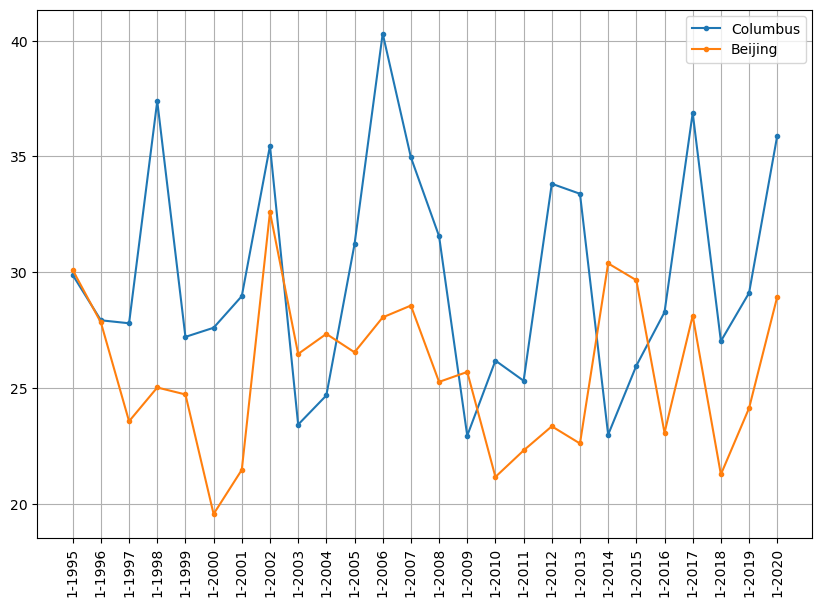

In [36]:
plt.figure(figsize=(10,7),dpi=100)
plt.grid()
plt.xticks(rotation = 'vertical')
plt.plot(dfcolumbusinjan.groupby('Month and year', as_index = False).mean()['Month and year'], dfcolumbusinjan.groupby('Month and year', as_index = False).mean()['AvgTemperature'], label = 'Columbus', marker = '.')
plt.plot(dfbeijing[dfbeijing['Month']== 1].groupby('Month and year', as_index=False).mean()['Month and year'], dfbeijing[dfbeijing['Month']== 1].groupby('Month and year', as_index=False).mean()['AvgTemperature'], label = 'Beijing', marker = '.')
plt.legend()

As we can see here, Beijing is slightly cooler than Columbus in Janurary overall. However, the standard deviation for Januraries in Columbus is noticably greater than that of Januraries in Beijing. 

In [37]:
dfshanghai = df[df['City']=='Shanghai']
dfshanghai.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
284726,Asia,China,NaN,Shanghai,1,1,1995,40.1
284727,Asia,China,NaN,Shanghai,1,2,1995,42.3
284728,Asia,China,NaN,Shanghai,1,3,1995,36.5
284729,Asia,China,NaN,Shanghai,1,4,1995,36.3
284730,Asia,China,NaN,Shanghai,1,5,1995,38.5


In [38]:
dfshanghai['Month and year'] = dfshanghai['Month'].astype(str) + '-' + dfshanghai['Year'].astype(str)
dfshanghai.head()

C:\Users\jason\AppData\Local\Temp/ipykernel_12812/257182328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfshanghai['Month and year'] = dfshanghai['Month'].astype(str) + '-' + dfshanghai['Year'].astype(str)


,Region,Country,State,City,Month,Day,Year,AvgTemperature,Month and year
284726,Asia,China,NaN,Shanghai,1,1,1995,40.1,1-1995
284727,Asia,China,NaN,Shanghai,1,2,1995,42.3,1-1995
284728,Asia,China,NaN,Shanghai,1,3,1995,36.5,1-1995
284729,Asia,China,NaN,Shanghai,1,4,1995,36.3,1-1995
284730,Asia,China,NaN,Shanghai,1,5,1995,38.5,1-1995


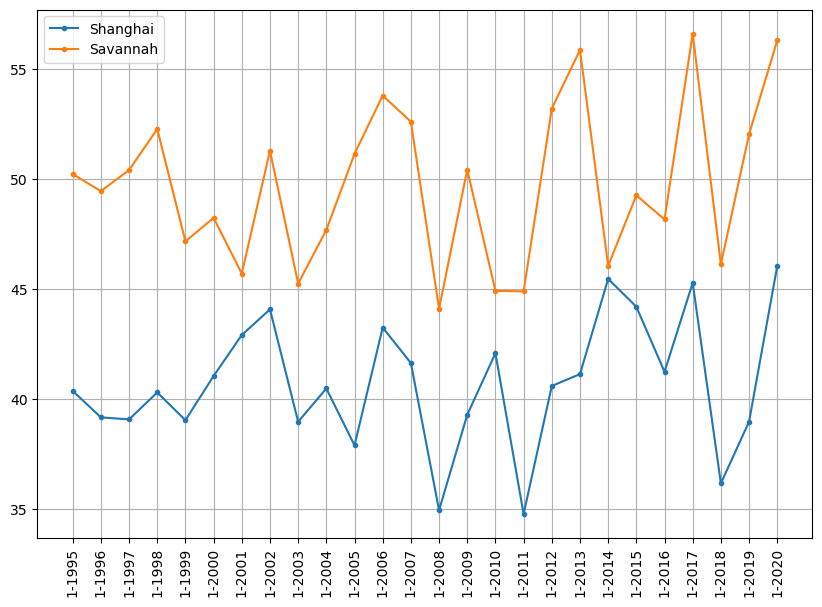

In [39]:
plt.figure(figsize=(10,7),dpi=(100))
plt.grid()
plt.xticks(rotation = 'vertical')
plt.plot(dfshanghai[dfshanghai['Month']==1].groupby('Month and year', as_index = False).mean()['Month and year'], dfshanghai[dfshanghai['Month']==1].groupby('Month and year', as_index = False).mean()['AvgTemperature'], label = 'Shanghai', marker='.')
plt.plot(dfsavannah[dfsavannah['Month']==1].groupby('Month and year', as_index = False).mean()['Month and year'], dfsavannah[dfsavannah['Month']==1].groupby('Month and year', as_index = False).mean()['AvgTemperature'], label = 'Savannah', marker='.')
plt.legend()

Despite being on the same latitude (and also being near the ocean), Shanghai is noticably colder than Savannah, to the point where the warmest Janurary recorded in Shanghai is about the same as the coldest Janurary recorded in Savannah. 

Can you conclude whether the arctic air patterns vs the siberian air patterns are completely different or not?

In [40]:
chinadiff = dfbeijing[dfbeijing['Month']==1].groupby('Month and year').mean()['AvgTemperature'] - dfshanghai[dfshanghai['Month']==1].groupby('Month and year').mean()['AvgTemperature']
chinadiff.head()

Month and year
1-1995   -10.258065
1-1996   -11.316129
1-1997   -15.487097
1-1998   -15.254839
1-1999   -14.293548
Name: AvgTemperature, dtype: float64

In [41]:
usdiff = dfcolumbus[dfcolumbus['Month']==1].groupby('Month and year').mean()['AvgTemperature'] - dfsavannah[dfsavannah['Month']==1].groupby('Month and year').mean()['AvgTemperature']
-usdiff
usdiff.index

Index(['1-1995', '1-1996', '1-1997', '1-1998', '1-1999', '1-2000', '1-2001',
       '1-2002', '1-2003', '1-2004', '1-2005', '1-2006', '1-2007', '1-2008',
       '1-2009', '1-2010', '1-2011', '1-2012', '1-2013', '1-2014', '1-2015',
       '1-2016', '1-2017', '1-2018', '1-2019', '1-2020'],
      dtype='object', name='Month and year')

In [42]:
dfcolumbusjanavg = dfcolumbus[dfcolumbus['Month']==1].groupby('Month and year', as_index = False).mean()
#dfcolumbus['diffwithsavannah'] = dfsavannah[dfsavannah['Month']==1].groupby('Month and year').mean()['AvgTemperature'] - dfcolumbus[dfcolumbus['Month']==1].groupby('Month and year').mean()['AvgTemperature']
#dfcolumbus
dfcolumbusjanavg
dfcolumbusjanavg['diffwithsavannah'] = -usdiff
dfcolumbusjanavg.head()

,Month and year,Month,Day,Year,AvgTemperature,diffwithsavannah
0,1-1995,1.0,16.0,1995.0,29.887097,NaN
1,1-1996,1.0,16.0,1996.0,27.932258,NaN
2,1-1997,1.0,16.0,1997.0,27.803226,NaN
3,1-1998,1.0,16.0,1998.0,37.387097,NaN
4,1-1999,1.0,16.0,1999.0,27.216129,NaN


In [43]:
differencedata = {'Month and year': chinadiff.index,
                  'usdiff': -usdiff,
               'chinadiff': -chinadiff}
differencedf = pd.DataFrame(differencedata)
differencedf.head()

,Month and year,usdiff,chinadiff
Month and year,,,
1-1995,1-1995,20.335484,10.258065
1-1996,1-1996,21.512903,11.316129
1-1997,1-1997,22.600000,15.487097
1-1998,1-1998,14.883871,15.254839
1-1999,1-1999,19.941935,14.293548


Text(0, 0.5, 'temp in F')

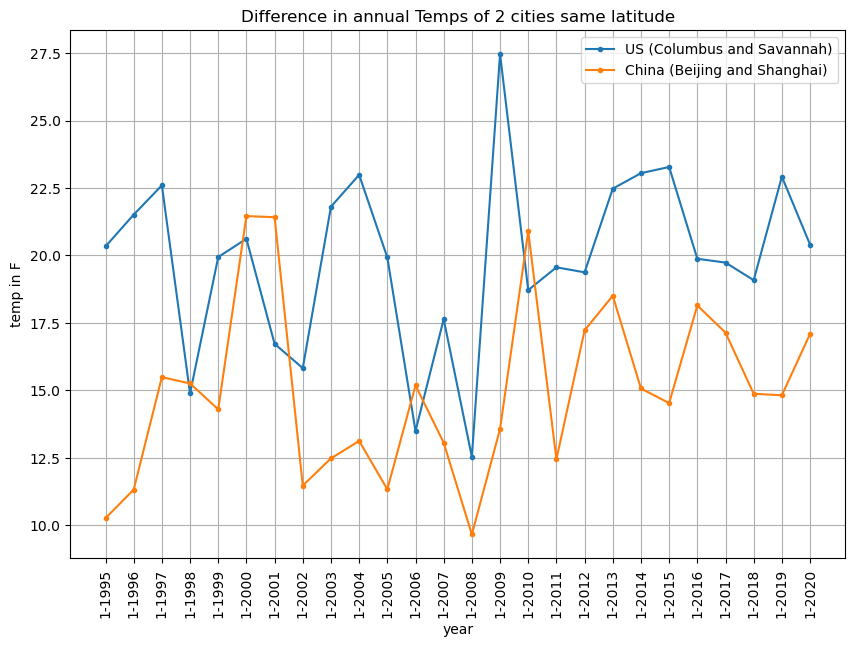

In [44]:
plt.figure(figsize=(10,7), dpi=100)
plt.grid()
plt.xticks(rotation = 'vertical')
plt.plot(differencedf['Month and year'],differencedf['usdiff'], label = 'US (Columbus and Savannah)', marker = '.')
plt.plot(differencedf['Month and year'],differencedf['chinadiff'], label = 'China (Beijing and Shanghai)', marker = '.')
plt.legend()
plt.title('Difference in annual Temps of 2 cities same latitude')
plt.xlabel('year')
plt.ylabel('temp in F')

What we've plotted here is basically the difference in the average Janurary temperatures by each Country (using the data of the 2 cities from each Country) and see how they compare to each other. We see here that Arctic air behaves differently from Siberian air; Arctic air is more susceptible to the influences from the gulf of Mexico than Siberian air is to the South China Sea. 

In [45]:
dfcolumbusjanavg.iloc[dfcolumbusjanavg[['AvgTemperature']].idxmin()['AvgTemperature']]

Month and year         1-2009
Month                     1.0
Day                      16.0
Year                   2009.0
AvgTemperature      22.951613
diffwithsavannah          NaN
Name: 14, dtype: object

In [46]:
differencedf['std of columbus'] = dfcolumbus[dfcolumbus['Month']==1].groupby('Month and year').std()['AvgTemperature']
differencedf['std of beijing'] = dfbeijing[dfbeijing['Month']==1].groupby('Month and year').std()['AvgTemperature']
differencedf.head()

,Month and year,usdiff,chinadiff,std of columbus,std of beijing
Month and year,,,,,
1-1995,1-1995,20.335484,10.258065,12.741396,3.588500
1-1996,1-1996,21.512903,11.316129,10.399403,3.344316
1-1997,1-1997,22.600000,15.487097,15.496505,6.163277
1-1998,1-1998,14.883871,15.254839,9.583936,5.327750
1-1999,1-1999,19.941935,14.293548,27.072029,23.485547


Text(0, 0.5, 'temp in F')

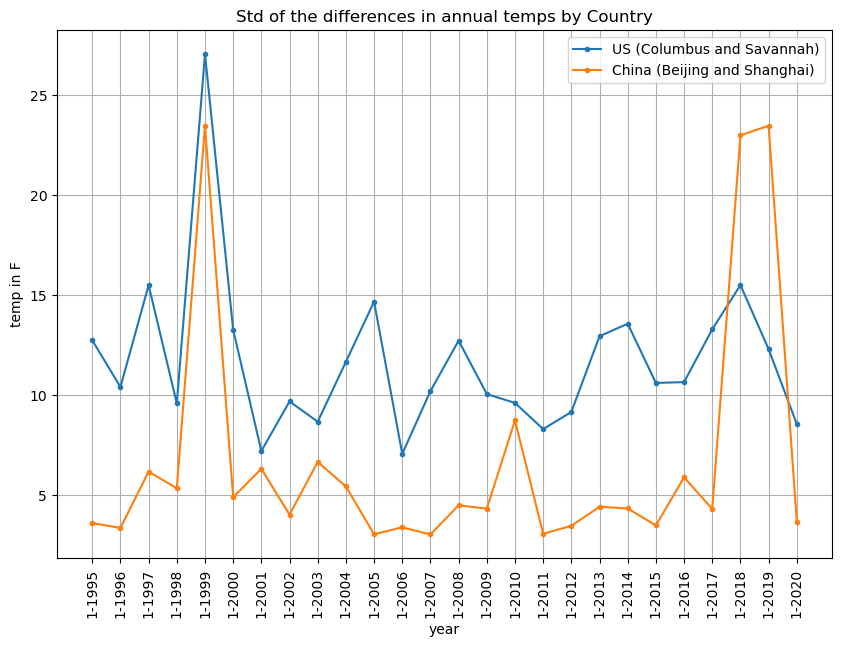

In [47]:
plt.figure(figsize=(10,7), dpi=100)
plt.grid()
plt.xticks(rotation = 'vertical')
plt.plot(differencedf['Month and year'],differencedf['std of columbus'], label = 'US (Columbus and Savannah)', marker = '.')
plt.plot(differencedf['Month and year'],differencedf['std of beijing'], label = 'China (Beijing and Shanghai)', marker = '.')
plt.legend()
plt.title('Std of the differences in annual temps by Country')
plt.xlabel('year')
plt.ylabel('temp in F')

We can use scatter plots to determine how likely the Arctic high and the Siberian high are to be active in the same year or not. 

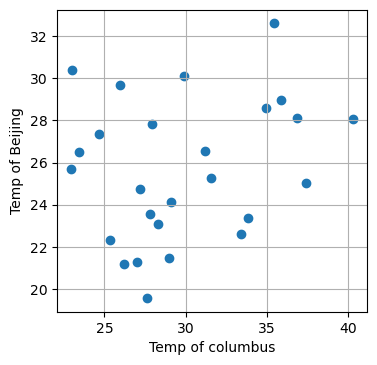

In [48]:
plt.figure(figsize=(4,4), dpi=100)
plt.grid()
plt.scatter(dfcolumbus[dfcolumbus['Month']==1].groupby('Month and year').mean()['AvgTemperature'], dfbeijing[dfbeijing['Month']==1].groupby('Month and year').mean()['AvgTemperature'])
plt.xlabel('Temp of columbus')
plt.ylabel('Temp of Beijing')
plt.show()

In [49]:
from scipy import stats
stats.pearsonr(dfcolumbus[dfcolumbus['Month']==1].groupby('Month and year').mean()['AvgTemperature'], dfbeijing[dfbeijing['Month']==1].groupby('Month and year').mean()['AvgTemperature'])[0]

0.24395954608467904

An R-Value of 0.24 means that it is rare for the Arctic High and the Siberian High to behave the same on each city the same year.

What about the correlation between Columbus and Savannah vs. Beijing and Shanghai? We should get pretty high R-values for each, but with the U.S cities having a lower R-value.

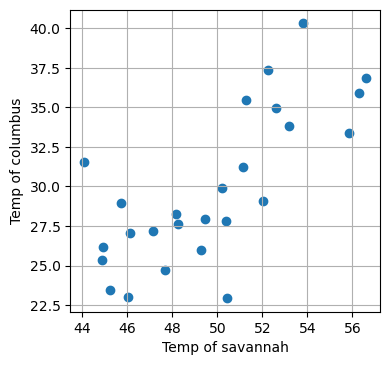

In [50]:
plt.figure(figsize=(4,4), dpi=100)
plt.grid()
plt.scatter(dfsavannah[dfsavannah['Month']==1].groupby('Month and year').mean()['AvgTemperature'], dfcolumbus[dfcolumbus['Month']==1].groupby('Month and year').mean()['AvgTemperature'])
plt.xlabel('Temp of savannah')
plt.ylabel('Temp of columbus')
plt.show()

In [51]:
stats.pearsonr(dfsavannah[dfsavannah['Month']==1].groupby('Month and year').mean()['AvgTemperature'], dfcolumbus[dfcolumbus['Month']==1].groupby('Month and year').mean()['AvgTemperature'])[0]

0.7308086965276582

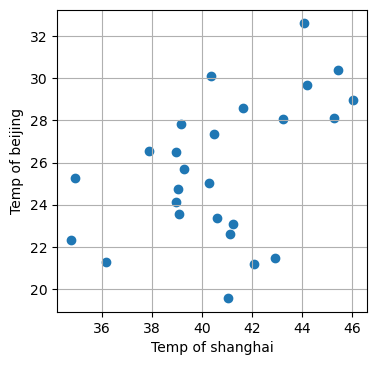

In [52]:
plt.figure(figsize=(4,4), dpi=100)
plt.grid()
plt.scatter(dfshanghai[dfshanghai['Month']==1].groupby('Month and year').mean()['AvgTemperature'], dfbeijing[dfbeijing['Month']==1].groupby('Month and year').mean()['AvgTemperature'])
plt.xlabel('Temp of shanghai')
plt.ylabel('Temp of beijing')
plt.show()

In [53]:
stats.pearsonr(dfshanghai[dfshanghai['Month']==1].groupby('Month and year').mean()['AvgTemperature'], dfbeijing[dfbeijing['Month']==1].groupby('Month and year').mean()['AvgTemperature'])[0]

0.4721131731668423

Lets study the correlation between the influence of the arctic high on the West coast vs. on the East coast!

In [54]:
dfsacramento = df[df['City']=='Sacramento']
dfsacramento.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
1579389,North America,US,California,Sacramento,1,1,1995,43.0
1579390,North America,US,California,Sacramento,1,2,1995,40.6
1579391,North America,US,California,Sacramento,1,3,1995,47.5
1579392,North America,US,California,Sacramento,1,4,1995,49.2
1579393,North America,US,California,Sacramento,1,5,1995,48.6


In [55]:
dfsacramento['Month and year'] = dfsacramento['Month'].astype(str) + '-' + dfsacramento['Year'].astype(str)
dfsacramento.head()

C:\Users\jason\AppData\Local\Temp/ipykernel_12812/481365398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsacramento['Month and year'] = dfsacramento['Month'].astype(str) + '-' + dfsacramento['Year'].astype(str)


,Region,Country,State,City,Month,Day,Year,AvgTemperature,Month and year
1579389,North America,US,California,Sacramento,1,1,1995,43.0,1-1995
1579390,North America,US,California,Sacramento,1,2,1995,40.6,1-1995
1579391,North America,US,California,Sacramento,1,3,1995,47.5,1-1995
1579392,North America,US,California,Sacramento,1,4,1995,49.2,1-1995
1579393,North America,US,California,Sacramento,1,5,1995,48.6,1-1995


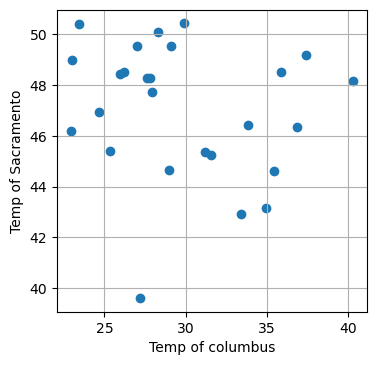

In [56]:
plt.figure(figsize=(4,4), dpi=100)
plt.grid()
plt.scatter(dfcolumbus[dfcolumbus['Month']==1].groupby('Month and year').mean()['AvgTemperature'], dfsacramento[dfsacramento['Month']==1].groupby('Month and year').mean()['AvgTemperature'])
plt.xlabel('Temp of columbus')
plt.ylabel('Temp of Sacramento')
plt.show()

In [57]:
stats.pearsonr(dfcolumbus[dfcolumbus['Month']==1].groupby('Month and year').mean()['AvgTemperature'], dfsacramento[dfsacramento['Month']==1].groupby('Month and year').mean()['AvgTemperature'])[0]

-0.17080240556511972

An R-value means that Sacramento is more likely to be above normal if Columbus is below normal in Janurary and vice versa. Lets make a heat map out of this!!! Can you create a heat-map showing all the R-values of all U.S cities relative to Columbus for Janurary?

In [58]:
citydata = []
citystate = []
cityname = []
for i in df[df['Country']=='US']['City'].unique():
    if df[df['City']==i].count()[0] == df[(df['City']=='Columbus') & (df['State']=='Ohio')].count()[0]:
        dftest = df[df['City']==i]
        dftest.loc[:, ('Month and year')] = dftest.loc[:, ('Month')].astype(str) + '-' + dftest.loc[:, ('Year')].astype(str)
        cityname.append(i)
        citystate.append([i, df[(df['City']==i) & (df['Country']=='US')]['State'].iloc[0]])
        citydata.append((stats.pearsonr(dfcolumbus[dfcolumbus['Month']==1].groupby('Month and year').mean()['AvgTemperature'], dftest[dftest['Month']==1].groupby('Month and year').mean()['AvgTemperature']))[0])

C:\Users\jason\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [59]:
dflist = pd.DataFrame(list(zip(cityname, citystate, citydata)), columns=['City', 'State', 'R-value'])
dflist.sort_values(by=['R-value'],ascending=True).head(10)

,City,State,R-value
14,San Diego,"[San Diego, California]",-0.383787
7,Phoenix,"[Phoenix, Arizona]",-0.348203
72,Las Vegas,"[Las Vegas, Nevada]",-0.324563
8,Tucson,"[Tucson, Arizona]",-0.319043
4,Anchorage,"[Anchorage, Alaska]",-0.281259
71,Reno,"[Reno, Nevada]",-0.266962
5,Fairbanks,"[Fairbanks, Alaska]",-0.262680
12,Los Angeles,"[Los Angeles, California]",-0.245474
15,San Francisco,"[San Francisco, California]",-0.229781
97,Medford,"[Medford, Oregon]",-0.200063


In [60]:
import geopandas as gpd

In [61]:
map_df = gpd.read_file('USA_adm/USA_adm1.shp')

In [62]:
import cartopy.crs as crs
import cartopy.feature as cfeature

df.head()

In [63]:
from geopy.geocoders import Nominatim
import math

In [64]:
geolocator = Nominatim(user_agent = 'jason_duong96@hotmail.com')
geolocator.geocode('Birmingham, AL')[1]

(33.5206824, -86.8024326)

In [65]:
latitude = []
longitude = []
for i in dflist['State']:
    latitude.append(geolocator.geocode(i)[1][0])
    longitude.append(geolocator.geocode(i)[1][1])


In [66]:
dflist = dflist.assign(Latitude = latitude, Longitude = longitude)

In [67]:
for index, i in enumerate(dflist['Longitude']):
    if i > -50:
        dflist = dflist.drop(index, axis = 0)
        


In [68]:
dflist.head()

,City,State,R-value,Latitude,Longitude
0,Birmingham,"[Birmingham, Alabama]",0.811971,33.520682,-86.802433
1,Huntsville,"[Huntsville, Alabama]",0.832138,34.729847,-86.585901
2,Mobile,"[Mobile, Alabama]",0.723790,30.694357,-88.043054
3,Montgomery,"[Montgomery, Alabama]",0.760007,32.366966,-86.300648
4,Anchorage,"[Anchorage, Alaska]",-0.281259,61.216313,-149.894852


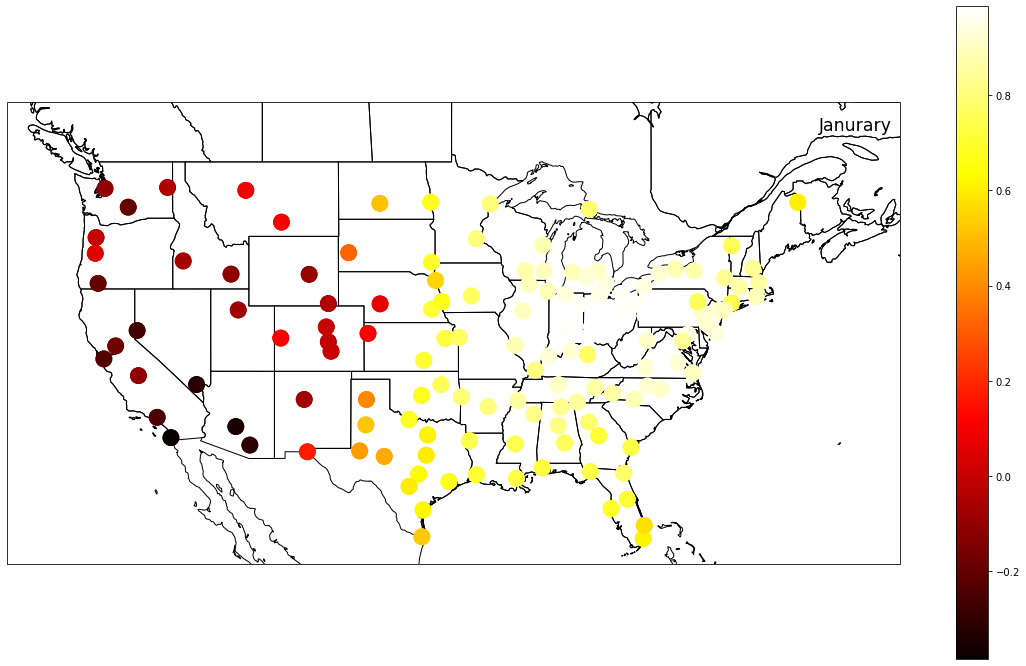

In [69]:
figure = plt.figure(figsize=(20,12))
ax = figure.add_subplot(1,1,1, projection=crs.Mercator())
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
# Zoom in on the US by setting longitude/latitude parameters
ax.set_extent(
    [-130, # minimum latitude
        -60, # min longitude
        24, # max latitude
        52 # max longitude
    ],
    crs=crs.PlateCarree()
)
plt.scatter(x=dflist['Longitude'], y=dflist['Latitude'], c = dflist['R-value'], s=250, alpha=1, cmap = 'hot', transform = crs.PlateCarree())
plt.colorbar(plt.scatter(x=dflist['Longitude'], y=dflist['Latitude'], c = dflist['R-value'], s=250, alpha=1, cmap = 'hot', transform = crs.PlateCarree()))
plt.text(0.95,0.95,'Janurary',horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, size= 'xx-large')
plt.show()

Nice! You've created a map that shows the influence of the Arctic High on most major U.S cities relative to Columbus, by showing the R-value of each major city (Janurary anamoly relative to Columbus) for Janurary! Now can you create an animation that shows all the R-values of each major city year-round?

In [70]:
dftest.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Month and year
2890275,North America,US,Wyoming,Cheyenne,1,1,1995,8.8,1-1995
2890276,North America,US,Wyoming,Cheyenne,1,2,1995,19.0,1-1995
2890277,North America,US,Wyoming,Cheyenne,1,3,1995,11.3,1-1995
2890278,North America,US,Wyoming,Cheyenne,1,4,1995,5.0,1-1995
2890279,North America,US,Wyoming,Cheyenne,1,5,1995,18.9,1-1995


In [71]:
dflist.head()

,City,State,R-value,Latitude,Longitude
0,Birmingham,"[Birmingham, Alabama]",0.811971,33.520682,-86.802433
1,Huntsville,"[Huntsville, Alabama]",0.832138,34.729847,-86.585901
2,Mobile,"[Mobile, Alabama]",0.723790,30.694357,-88.043054
3,Montgomery,"[Montgomery, Alabama]",0.760007,32.366966,-86.300648
4,Anchorage,"[Anchorage, Alaska]",-0.281259,61.216313,-149.894852


In [72]:
dflist= dflist[['City', 'State', 'Latitude', 'Longitude', 'R-value']]
dflist.head()

,City,State,Latitude,Longitude,R-value
0,Birmingham,"[Birmingham, Alabama]",33.520682,-86.802433,0.811971
1,Huntsville,"[Huntsville, Alabama]",34.729847,-86.585901,0.832138
2,Mobile,"[Mobile, Alabama]",30.694357,-88.043054,0.723790
3,Montgomery,"[Montgomery, Alabama]",32.366966,-86.300648,0.760007
4,Anchorage,"[Anchorage, Alaska]",61.216313,-149.894852,-0.281259


In [73]:
dfexample = dflist

In [74]:
dfcolumbus.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Month and year
2402743,North America,US,Ohio,Columbus,1,1,1995,42.4,1-1995
2402744,North America,US,Ohio,Columbus,1,2,1995,21.4,1-1995
2402745,North America,US,Ohio,Columbus,1,3,1995,22.5,1-1995
2402746,North America,US,Ohio,Columbus,1,4,1995,14.3,1-1995
2402747,North America,US,Ohio,Columbus,1,5,1995,8.1,1-1995


In [75]:
for i in range(1,13,1):
    citydata = []
    for k in df[df['Country']=='US']['City'].unique():
        if df[df['City']==k].count()[0] == df[(df['City']=='Columbus') & (df['State']=='Ohio')].count()[0]:
            dftest = df[df['City']==k]
            dftest.loc[:, ('Month and year')] = dftest.loc[:, ('Month')].astype(str) + '-' + dftest.loc[:, ('Year')].astype(str)
            citydata.append((stats.pearsonr(dfcolumbus[dfcolumbus['Month']==i].groupby('Month and year').mean()['AvgTemperature'], dftest[dftest['Month']==i].groupby('Month and year').mean()['AvgTemperature']))[0])
    dflist.insert(3+i, 'x', citydata, True)
    

C:\Users\jason\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [76]:
dflist.head()

,City,State,Latitude,Longitude,x,x,x,x,x,x,x,x,x,x,x,x,R-value
0,Birmingham,"[Birmingham, Alabama]",33.520682,-86.802433,0.811971,0.764813,0.674194,0.787112,0.794296,0.905613,0.531440,0.469047,0.782188,0.586545,0.859729,0.904047,0.811971
1,Huntsville,"[Huntsville, Alabama]",34.729847,-86.585901,0.832138,0.810201,0.842708,0.825684,0.857858,0.889830,0.512275,0.491537,0.821712,0.595810,0.887162,0.908491,0.832138
2,Mobile,"[Mobile, Alabama]",30.694357,-88.043054,0.723790,0.658819,0.638844,0.618790,0.597903,0.724852,0.087602,0.239195,0.627794,0.295005,0.724522,0.835678,0.723790
3,Montgomery,"[Montgomery, Alabama]",32.366966,-86.300648,0.760007,0.641159,0.669242,0.673749,0.366611,0.344063,0.201661,0.171770,0.793530,0.509298,0.780341,0.854806,0.760007
4,Anchorage,"[Anchorage, Alaska]",61.216313,-149.894852,-0.281259,-0.042835,-0.439030,-0.044007,-0.221717,0.806155,-0.192204,-0.058120,0.386019,0.005732,-0.434079,0.247991,-0.281259


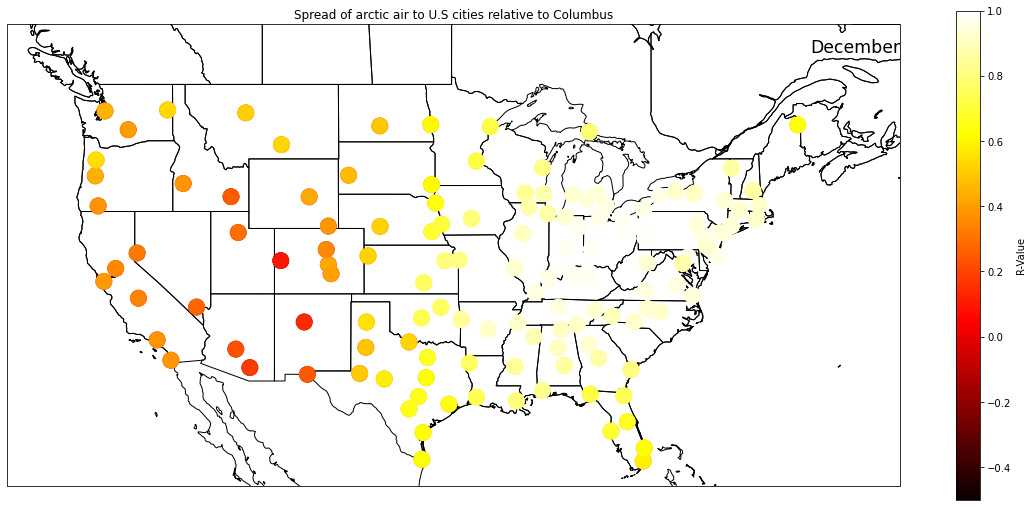

In [77]:
from IPython import display
from matplotlib import animation
months = ['January','Feburary', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for i in range(1,13,1):
    figure = plt.figure(figsize=(20,12))
    ax = figure.add_subplot(1,1,1, projection=crs.Mercator())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    # Zoom in on the US by setting longitude/latitude parameters
    ax.set_extent(
    [-130, # minimum latitude
        -60, # min longitude
        24, # max latitude
        52 # max longitude
    ],
    crs=crs.PlateCarree()
    )
    display.clear_output(wait=True)
    plt.scatter(x=dflist['Longitude'], y=dflist['Latitude'], c = dflist.iloc[:, 3+i], s=250, alpha=1, cmap = 'hot', transform = crs.PlateCarree())
    plt.title('Spread of arctic air to U.S cities relative to Columbus')
    plt.colorbar(plt.scatter(x=dflist['Longitude'], y=dflist['Latitude'], c = dflist.iloc[:, 3+i], s=250, alpha=1, cmap = 'hot', transform = crs.PlateCarree()), label='R-Value', shrink=0.75)
    plt.clim(vmin=-0.5, vmax=1)
    plt.text(0.95,0.95,months[i-1],horizontalalignment='center', verticalalignment='center', transform = ax.transAxes, size= 'xx-large')
    plt.pause(0.5)
    plt.show()